# LAB 2

In [1]:
import cv2  # pip install
import numpy as np  # pip install
import glob
import matplotlib.pyplot as plt # pip install
from scipy.spatial import distance as dist  # pip install

In [2]:
images = {}
index = {}
for path in glob.glob("./data/*.jpg"):
#     print(path)
    image = cv2.imread(path)
    filename = path.split("/")[-1].replace(".jpg","")
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([images[filename]],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    hist = cv2.normalize(hist,hist)
    index[filename] = hist.flatten()
    print(filename)

spiderman
wonderwoman
venom
wonderwoman2
ironman
wolverine
magnetto
hulk


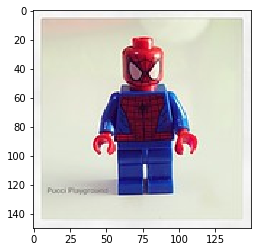

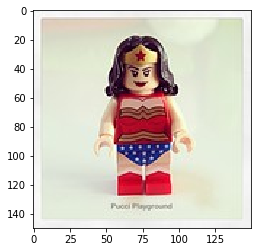

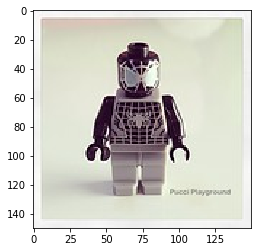

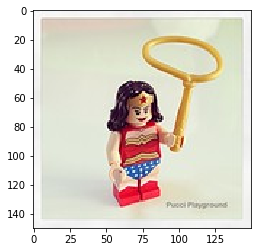

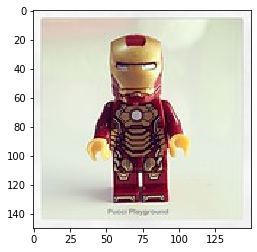

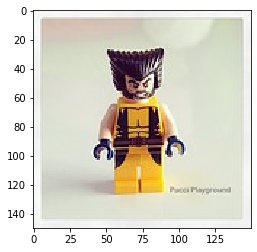

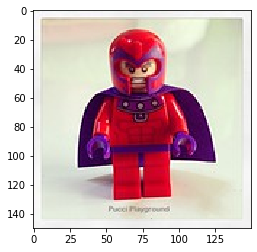

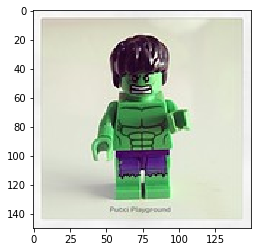

In [3]:
for k,v in images.items():
    plt.figure()
    plt.imshow(v)

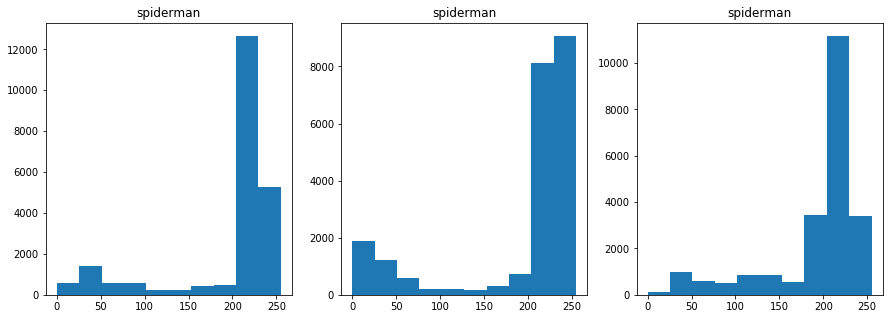

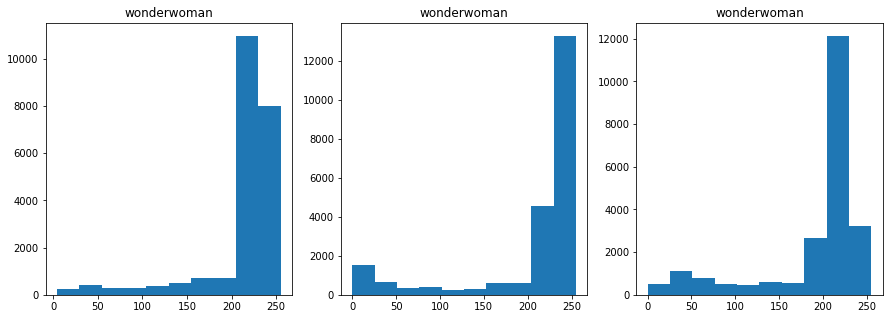

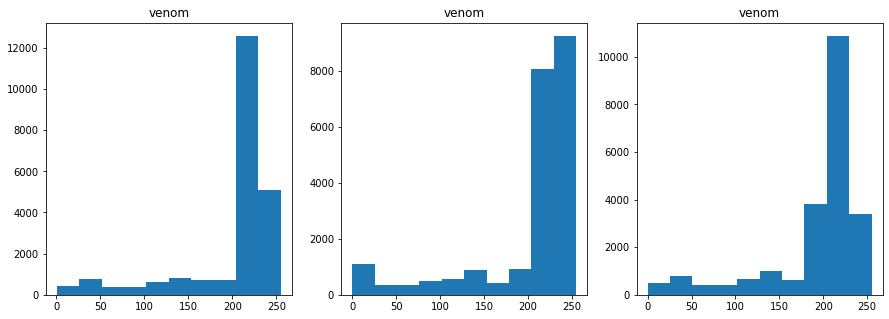

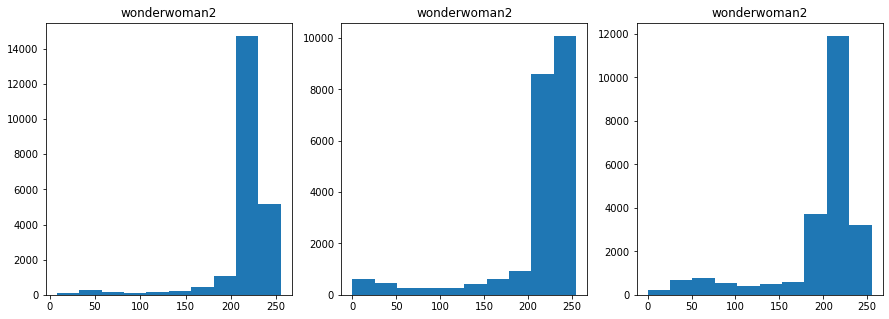

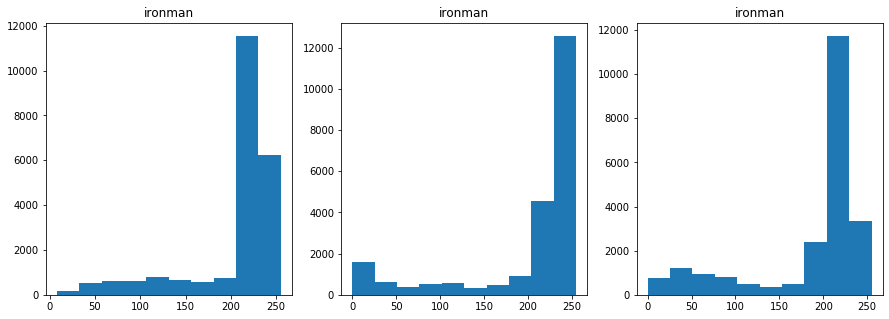

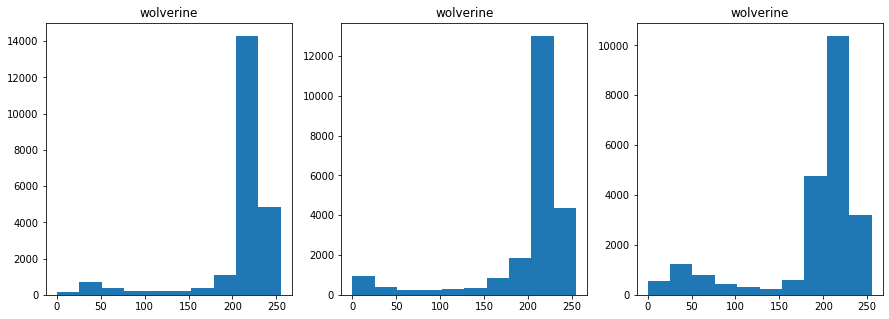

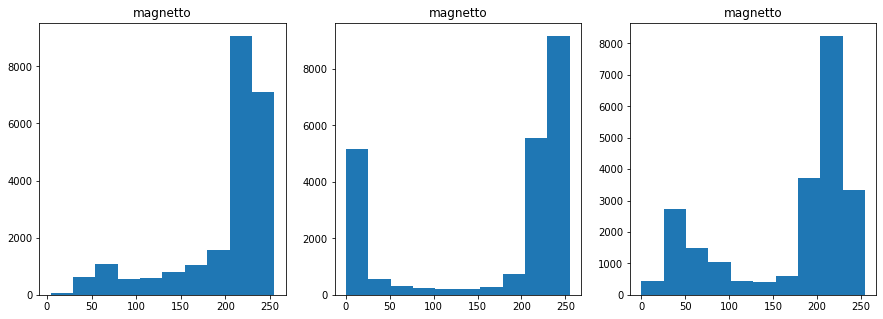

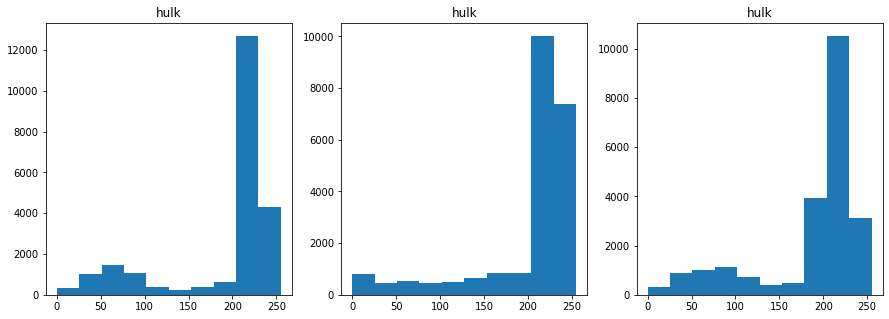

In [4]:
for k,v in images.items():
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,3,1)
    ax1.set_title(k)
    ax1.hist(v[:,:,0].flatten())
    ax2 = plt.subplot(1,3,2)
    ax2.set_title(k)
    ax2.hist(v[:,:,1].flatten())
    ax3 = plt.subplot(1,3,3)
    ax3.set_title(k)
    ax3.hist(v[:,:,2].flatten())    

Euc <function euclidean at 0x7fba4b7ca170>
Taxi <function cityblock at 0x7fba4b7ca5f0>


/Users/rauan.assabayev/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


Cheb <function chebyshev at 0x7fba4b7ca710>


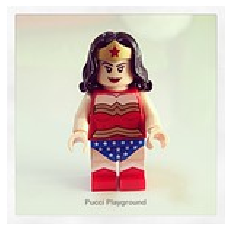

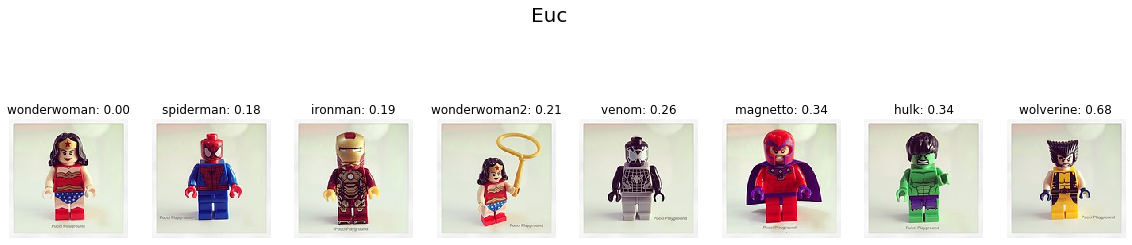

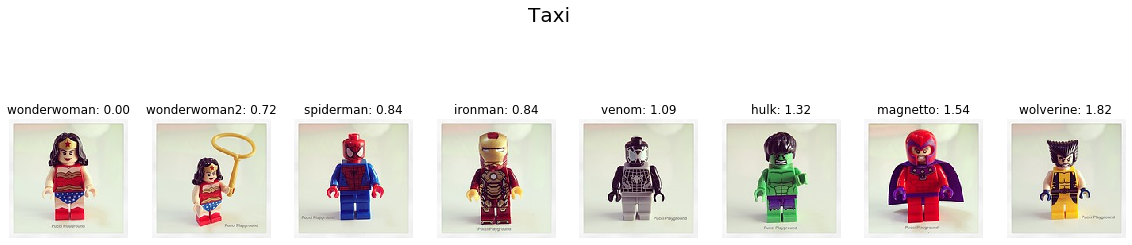

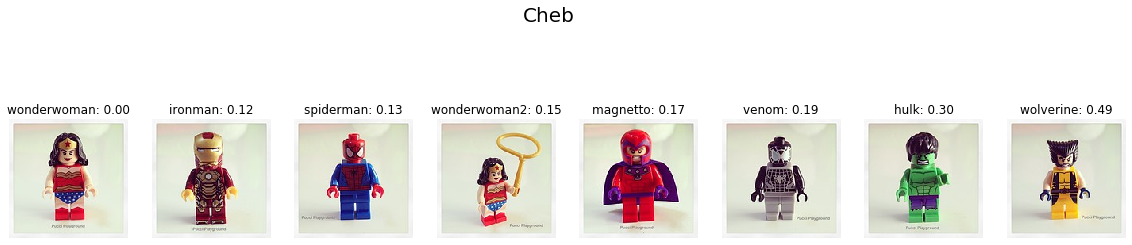

In [5]:
METRICS = (
    ("Euc",dist.euclidean),
    ("Taxi",dist.cityblock),
    ("Cheb",dist.chebyshev)
)

for name,method in METRICS:
    print(name,method)
    result = {}
    for k,hist in index.items():
        d = method(index["wonderwoman"], hist)
        result[k] = d
    result = sorted([(v,k) for k,v in result.items()])
#     print(result)
    figure = plt.figure("Query")
    ax1 = figure.add_subplot(1,1,1)
    ax1.imshow(images["wonderwoman"])
    plt.axis("off")
    fig = plt.figure("Results: %s" % (name), figsize=(20,5))
    fig.suptitle(name, fontsize = 20)
    for i,(v,k) in enumerate(result):
        ax = fig.add_subplot(1, len(images),i+1)
        ax.set_title("%s: %.2f" % (k,v))
        plt.imshow(images[k])
        plt.axis("off")
        

# HOMEWORK

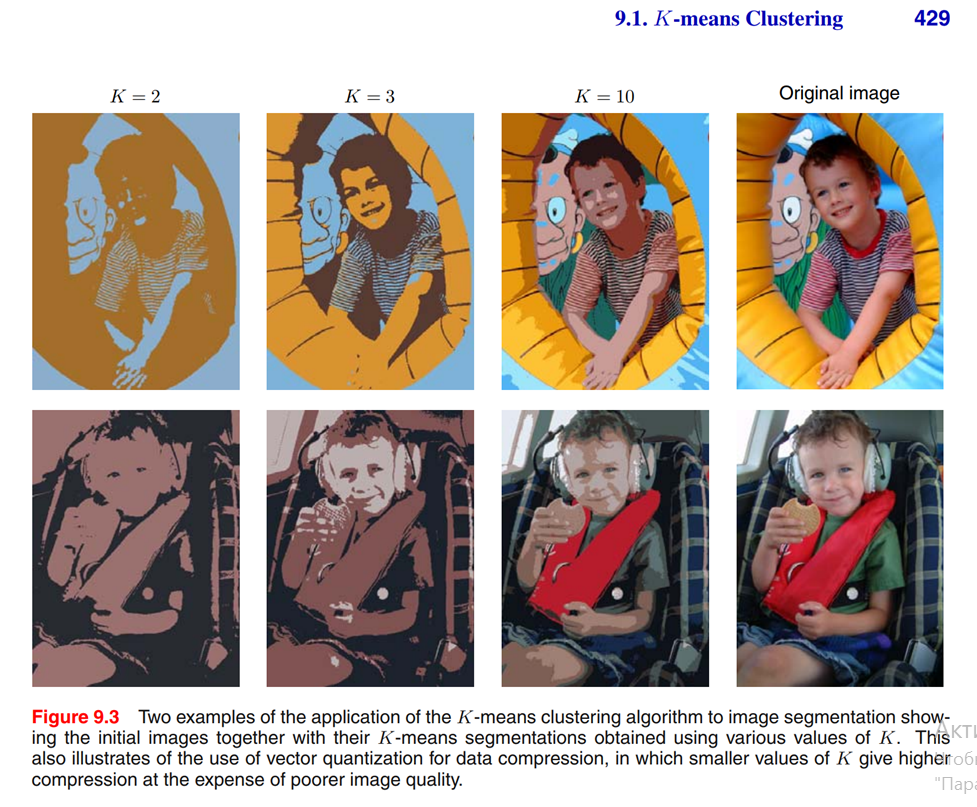

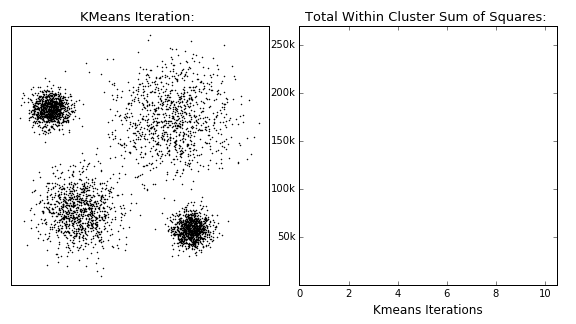

## Introduction to K-Means Clustering
* Step 1: Choose the number of clusters k. ...
* Step 2: Select k random points from the data as centroids. ...
* Step 3: Assign all the points to the closest cluster centroid. ...
* Step 4: Recompute the centroids of newly formed clusters. ...
* Step 5: Repeat steps 3 and 4.

### Task
* Read 9.1 - KMeans of Bishop book

* Develop the code of the K-means clustering algorithm for Image Segmentation. In Fig.9.3 you can see an example of the final processing result. You should use only the NumPy library. Test your implementation against k = [2,3,10]. Visualize your result. Write a conclusion about the complexity of your implementation and the quality of image compression. Don't use copy-past from the internet, cause it deserves zero marks.


In [6]:
import numpy as np

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KMeans:
    def __init__ (self, K= 5, max_iters= 5):
        self.K = K  
        self.max_iters = max_iters

        # list of lists containing the required number of clusters
        self.clusters = [[] for _ in range(self.K)]
        # mean feature vector for each cluster
        self.centroids = []

    # Function to classify the clusters for each datapoint
    def classify(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # randomly initialising initial centroids
        random_sample_indices = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[index] for index in random_sample_indices]

        # getting the optimal location of the centroids
        for _ in range(self.max_iters):
            # updating clusters
            self.clusters = self._create_clusters(self.centroids)
            # updating centroids 
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            # checking for convergence
            if self._is_converged(centroids_old, self.centroids):
                break
    
        centroid_idx = []
        for xi in self.X  :
            centroid_idx.append(np.argmin([np.linalg.norm(xi-c) for c in self.centroids]))
    
        clus_image = self.X        
        for i in range(len(clus_image)):
            clus_image[i] = self.centroids[centroid_idx][i]
        return clus_image

    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for index, sample in enumerate(self.X):
            centroid_index = self._closest_centroid(sample, centroids)
            clusters[centroid_index].append(index)
        return clusters
    
    # helper function which finds the nearest centroid for each data point
    # uses Euclidean distance
    def _closest_centroid(self, sample, centroids):
         distances = [euclidean_distance(sample, point) for point in centroids]
         closes_index = np.argmin(distances)
         return closes_index

    # helper function to get the centroids of the created clusters    
    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_index, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis= 0)
            centroids[cluster_index] = cluster_mean
        return centroids 
    
    # function that checks whether the centoroids change after each round of iteration
    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

In [7]:
# Input data
data = [images["hulk"].reshape((-1,3)) for k in images.keys()]

(-0.5, 149.5, 149.5, -0.5)

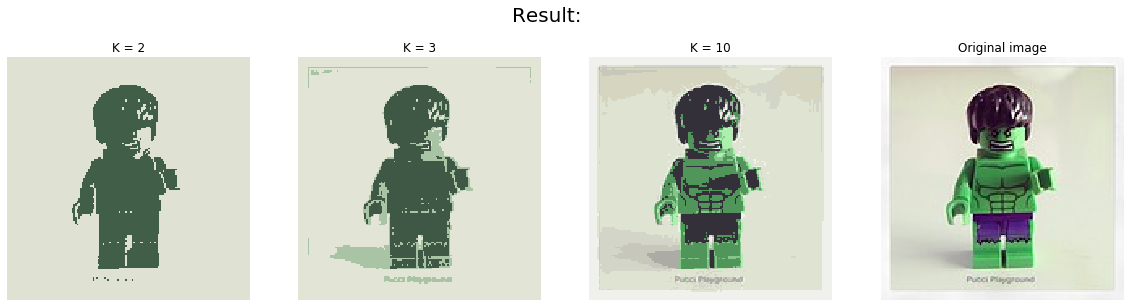

In [8]:
import copy
# Visualize the result image 
# Put your code here
fig = plt.figure("Result:", figsize=(20,5))
fig.suptitle('Result:', fontsize = 20)

i = 0;
for k in [2, 3, 10]:
    k_means = KMeans(K=k)
    img = k_means.classify(copy.deepcopy(data[1]))
    img = img.reshape((150, 150, 3)) # reshape data into the original image dimensions
    ax = fig.add_subplot(1,4,i+1)
    ax.set_title("K = %s" % (k))
    plt.imshow(img)
    plt.axis("off")
    i+=1
        
ax = fig.add_subplot(1,4,4)
ax.set_title("Original image")
plt.imshow(images["hulk"])
plt.axis("off")        

# Conclusion 

## Complexity O(n2)